In [1]:
import jax.numpy as np
from jax import grad
import pandas as pd
import matplotlib.pyplot as plt
import jax

In [7]:
train_data = pd.read_csv("../../../../DeepLearning/Datasets/mnist_train_small.csv")
train_data=train_data.to_numpy()
x_train = train_data[:,1:] / 255
y_train = train_data[:,0]

In [8]:
test_data = pd.read_csv("../../../../DeepLearning/Datasets/mnist_test.csv")
test_data=test_data.to_numpy()
x_test = test_data[:,1:] / 255
y_test = test_data[:,0]

7


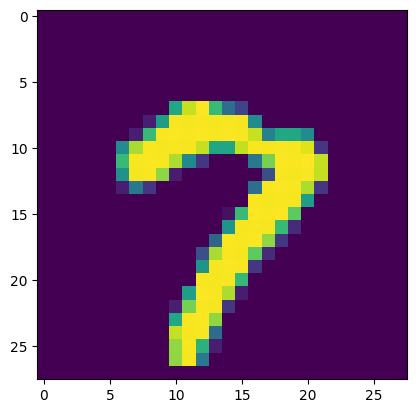

In [9]:
print(y_train[10])
plt.imshow(x_train[10].reshape((28,28)))

In [10]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
tanh = lambda x: (1 - np.exp(-x)) / (1 + np.exp(-x))

def softmax(x):
    expx = np.exp(x)
    return expx / np.sum(expx,axis=1).reshape((-1,1))

In [36]:
def init_params(n_inp,n_hidden,n_out):
    generate_random = lambda shape: jax.random.normal(jax.random.PRNGKey(0),shape)
    W1 = generate_random((n_inp,n_hidden)) / (n_hidden)
    b1 = generate_random((n_hidden,))  / (n_hidden)
    W2 = generate_random((n_hidden,n_out))  / (n_out)
    b2 = generate_random((n_out,)) / (n_out)
    return (W1,b1,W2,b2)

def forward(params,x):
    W1,b1,W2,b2 = params
    o = x @ W1 + b1
    o = sigmoid(o)
    o = o @ W2 + b2
    # o = sigmoid(o)
    return o

def update_params(params,dparams,lr=0.1):
    new_params = []
    for p,dp in zip(params,dparams):
        new_params.append(p - lr*dp)
    return tuple(new_params)

In [37]:
def mse_loss(params,x,y):
    o = forward(params, x)
    y_ = jax.nn.one_hot(y,10)
    dLdo = (o - y_)
    loss = np.mean(dLdo ** 2 / 2)
    return loss

def ce_loss(params,x,y):
    o = forward(params, x)
    y_ = jax.nn.one_hot(y,10)
    loss = np.mean(- y_ * np.log(softmax(o)))
    return loss

In [38]:
grad_loss = jax.jit(jax.value_and_grad(ce_loss))

In [39]:
params = init_params(28*28,256,10)

In [40]:
N = len(x_train)
epochs = 10
batch_size = 64
for epoch in range(epochs):
    tot_loss = 0
    for i in range(N // batch_size + 1):
        x_ = x_train[i*batch_size:(i+1)*batch_size] 
        y_ = y_train[i*batch_size:(i+1)*batch_size]
        loss, dparams = grad_loss(params,x_,y_)
        tot_loss += loss
        params = update_params(params,dparams,lr=0.1)
    print(tot_loss)

64.85497
51.728596
41.58187
34.25469
29.180414
25.635908
23.081224
21.173086
19.700272
18.531034


In [41]:
o = forward(params,x_test[:10])

In [42]:
np.argmax(o,axis=1)

Array([2, 1, 0, 4, 1, 4, 9, 6, 9, 0], dtype=int32)

In [43]:
y_test[:10]

array([2, 1, 0, 4, 1, 4, 9, 5, 9, 0], dtype=int64)